# Analiza Datelor

Înainte de a decide ce să facem cu datele noastre e bine să ne uităm la ele, să observăm tendințele și distribuția datelor. Ne poate fi mai ușor să găsim features relevante sau să alegem ce model se potrivește mai bine. În acest laborator vom recapitula elementele de bază și discuta pe scurt librării utile.

Uitați-vă la următoarele exemple, intrați pe linkuri unde vreți să învățați mai multe, apoi puteți începe să lucrați exercițiile de la laborator -- sunt marcate ca assignment opțional pentru modulul curent pe Teams, sub _classwork_.


# Python
<!-- This section is just a recap. You can skip it if you are familiar with Python functions and classes. -->
Această secțiune este recapitulativă. Puteți sări peste dacă sunteți familiari cu funcțiile și clasele din Python.

<!-- If you are completely unfamiliar with Python you should follow a separate online course first, for example https://www.w3schools.com/python/. -->
Dacă nu ați mai folosit vreodată Python, parcurgeți întâi un scurt tutorial, de exemplu:
- https://www.w3schools.com/python/ sau
- https://learn-python.adamemery.dev/basics

<!-- ## Functions -->
## Funcții

Pentru a defini o [funcție](https://docs.python.org/3/tutorial/controlflow.html#defining-functions), folosim cuvântul cheie `def`. Funcțiile pot avea oricât de mulți parametri[*](https://stackoverflow.com/a/48051450) și pot returna oricâte valori**.
Atât parametrii de intrare, cât și valorile întoarse pot avea orice tip de date, inclusiv alte funcții și clase.
Opțional, putem specifica și tipurile de date pentru parametri, însă verificarea este făcută doar de IDE/linters, nu și de compilator.

---
<sub>** O funcție întoarce de fapt doar o singură valoare, însă valoarea este implicit un tuplu dacă întoarcem "mai multe valori".</sub>
<!-- You can define a function by using the keyword _def_. Functions can have however many parameters and can return as many outputs as you want. Both parameters and outputs can have any data type, including other functions and classes. You can declare what data type each one should have, but the restriction is not actually checked by the compiler. -->

In [ ]:
def f(age: int, name = "Bran") -> str:
  pass

f('Age')

<!-- Parameters can also have implicit values, but they should always be at the end of the parameter list. -->
Dacă un parametru are valoare implicită, trebuie să fie la finalul listei de parametri.

<!-- Notice the use of the _pass_ keyword: we use it to declare that the definition is TBD. The compiler aknowledges this and does not throw an error. -->
Cuvântul cheie `pass` este util pentru a semnala că implementarea lipsește momentan, iar compilatorul nu aruncă eroare.
La modul general, putem folosi `pass` oriunde sintaxa limbajului cere o instrucțiune și nu avem ce să punem în loc.

<!-- ## Classes -->
## Clase

<!-- You can define a class by using the keyword _class_. A class can have static variabled which can be called either at the class level or at the instance level. -->
Pentru a defini o [clasă](https://docs.python.org/3/tutorial/classes.html), folosim cuvântul cheie `class`.

Clasele pot avea atât variabile de instanță (definite în constructor), cât si variabile la nivel de clasă.

Variabilele de clasă sunt similare cu variabilele statice din alte limbaje, însă există unele diferențe.

In [ ]:
class Clasa:
  x  = 10

Clasa.x

10

In [ ]:
instance = Clasa()
instance.x

10

<!-- This becomes interesting once we want to update the static variable. Updating it at the class level applies to all existing instances, but updating an instance is independent. -->
Diferențele față de alte limbaje apar atunci când dorim actualizarea unei variabile de clasă.

Dacă actualizăm variabila prin numele clasei, modificarea este vizibilă atât la accesul prin numele clasei, cât și la acces prin orice instanță.

Dacă actualizăm variabila prin intermediul unei instanțe, ce se întâmplă de fapt este că se creează un nou atribut pe instanță, iar pentru acea instanță, atributul pe clasă este ascuns.

Totuși, la fel ca în alte limbaje, accesul variabilelor de clasă printr-o instanță este un antipattern tocmai pentru că poate cauza confuzie 🙂

In [ ]:
instance.x += 1
print(Clasa.x, instance.x)

10 11


<!-- All class-level functions start with the _self_ parameter. It is a pointer to the current class and can have any name you want to give it, _self_ is just a convention. -->
Toate funcțiile membru ale unei clase au ca prim parametru `self` (asemănător cu `*this`). `self` este o referință la obiectul curent, necesar pentru a accesa atributele membru ale obiectului.

Teoretic, numele de `self` este doar o convenție și putem folosi orice nume. Practic, multe IDE-uri/instrumente/biblioteci presupun că se numește `self`, deci nu prea avem de ales 🙂

In [ ]:
class Clasa:
  x = 3

  def f(self, x):
    return self.x, x

instance = Clasa()
instance.f(7)

(3, 7)

<!-- Notice how _x_ and _self.x_ are independent variables. This is because function parameters are always independent from the outside scope, while variables that begin with _self._ are class-specific. -->
Remarcăm faptul că `x` și `self.x` au valori distincte, fiind variabile independende una de cealaltă.

Parametrii formali de după `self` ai unei funcții membru sunt independenți de variabilele membru. Prin variabile membru înțelegem toate variabilele care încep cu `self.`.

<!-- Classes in Python have a series of implicit functions. For example:
- \_\_init\_\_ -> class initialization (constructor)
- \_\_str\_\_ -> define the string instance for the current class
- \_\_lt\_\_ -> define the < operator
- \_\_le\_\_ -> define the <= operator
- \_\_gt\_\_ -> define the > operator

Functions can either be called by using their respective name (eg: _lt(a, b)_) or by using the corresponsing symbol (eg: _a < b_). -->

Clasele din Python au o serie de [funcții speciale](https://docs.python.org/3/reference/datamodel.html#special-method-names). Exemple:
- `__init__` -> constructor (pentru inițializarea unui obiect); în cazul claselor derivate, trebuie apelați explicit constructorii claselor de bază (e.g. `super().__init__(args)`)
- `__str__` -> reprezentarea obiectului ca un string ușor de citit (un fel de `operator<<` sau `toString`)
- `__repr__` -> reprezentarea obiectului ca un string cu informații pentru debugging
- `__lt__` -> definirea operatorului `<`
- `__le__` -> definirea operatorului `<=`
- `__gt__` -> definirea operatorului `>`

Funcțiile pot fi apelate fie explicit prin numele funcției asociate (dacă există; e.g. `str(instance)`) sau implicit pe baza operatorului sau contextului (e.g. `a < b`).

In [ ]:
class Clasa:
  def __init__(self, x):
    self.x = x

  def __str__(self):
    return "Class value: " + str(self.x)

instance = Clasa(5)  # apelează __init__
print(instance)      # apelează __str__

Class value: 5


<!-- For anything else you can check the Python documentation: https://docs.python.org/3/ -->
Informații suplimentare pot fi găsite în documentația oficială: https://docs.python.org/3/

# Web Scraping / Extragere de date web

<!-- Scraping data from the internet can be useful for datamining, creating datasets or otherwise simplifying our workload. -->
Extragerea de date de pe internet este utilă pentru multe scopuri, de exemplu data mining sau crearea de seturi de date.
<!-- https://pbs.twimg.com/media/FQNGIMRXsAMXldk?format=jpg :) -->


<!-- As a first step we need to make a request to the server to provide the page at the given url: -->
Un prim pas este să facem o cerere la pagina web din care dorim extragerea de informații:

In [ ]:
! pip install requests

In [ ]:
import requests

url = "https://codeforces.com/contests"
html = requests.get(url)
print(html)

<Response [200]>


<!-- Response 200 indicates that the request was made succesfully, and we can access the html data from the local scope. -->
Codul de răspuns 200 înseamnă că cererea s-a încheiat cu succes și avem acces la codul HTML al paginii respective.

Alte coduri 2xx indică diverse forme de răspuns corect.

Codurile 3xx indică redirecționări - putem configura redirecționări automate cu `requests.get(url, allow_redirects=True)`

Codurile 4xx indică erori pe care de obicei le putem remedia (atunci când sunt din vina noastră).

Codurile 5xx indică erori de server pe care nu le putem remedia ("e de la ei").

<!-- We now have to choose how to parse the data. Vanilla handling is always an option, but not an efficient one. For scraping non-tabular data we can use libraries, like [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) or [Scrapy](https://docs.scrapy.org/), while for tabular data we can use [Pandas](https://pandas.pydata.org/docs/index.html): -->
Acum trebuie să decidem modul în care parsăm răspunsul HTML. Pentru cazurile foarte simple pot fi suficiente expresii regulate, însă acestea sunt fragile.


Dacă datele nu sunt tabelare, putem folosi [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) sau [Scrapy](https://docs.scrapy.org/). Pentru date tabelare putem folosi [Pandas](https://pandas.pydata.org/docs/index.html):

In [ ]:
import pandas as pd

df = pd.read_html(html.content)[0]
df

,Name,Writers,Start,Length,Unnamed: 4,Unnamed: 5
0,XVIII Open Olympiad in Informatics - Final Sta...,Mangooste Ormlis Papaz239 TheEvilBird Tikh...,Mar/08/2024 12:05,05:00,Before start 2 days,Before registration 24:19:11
1,XVIII Open Olympiad in Informatics - Final Sta...,Mangooste Ormlis Papaz239 TheEvilBird Tikh...,Mar/09/2024 12:05,05:00,Before start 3 days,Before registration 24:19:09


### Câteva observații despre scraping

- verificați întotdeauna codul de răspuns întors de server
- nu faceți multe cereri într-un timp foarte scurt - veți primi 429 (Too many requests) și probabil IP ban temporar
  - nu folosiți un interval fix între cereri - bate la ochi
- configurați un header de User-Agent "uman"; sau și mai bine, alternați valorile acestui header
- cookies
  - unele sites configurează un [CSRF token](https://en.wikipedia.org/wiki/Cross-site_request_forgery#Prevention) pe prima pagină pe care trebuie să îl trimitem pe paginile următoare; acest token se poate regăsi fie în cookies, fie direct în codul paginii
  - dimpotrivă, alte sites se pot folosi de cookies ca să blocheze scrapers (cf. Scrapy docs)
- folosiți network tools din developer tools din browser pentru a analiza cererile
- pentru pagini dinamice care depind de JavaScript, trebuie folosit un browser, de exemplu cu [Selenium](https://www.selenium.dev/documentation/webdriver/getting_started/install_library/) sau [Playwright](https://playwright.dev/python/docs/intro)
- uneori poate fi util să încercați depanarea cu un alt client, de exemplu curl
- dacă sunteți la început și nu aveți un scop clar, salvați tot răspunsul primit de la server (HTML/JSON/XML etc), nu doar datele de interes; în acest fel, dacă ulterior vă răzgândiți, nu aveți nevoie să refaceți de la zero fiecare cerere


# Pandas

[Pandas](https://pandas.pydata.org/) și [Polars](https://pola.rs/) este o librărie folosită pentru date tabulare. Putem fie să creăm un corpus de la 0, să îl citim dintr-un fișier sau să îl scrapeuim de pe net.

Datele vor fi salvate într-un obiect de tip _Dataframe_. Avem flexibilitate totală asupra acestui tip de date: putem să adăugăm sau ștergem linii și coloane, putem modifica indecși și valori, putem filtra și grupa după oricâte reguli vrem. Să ne uităm la dataframeul de mai devreme. Observați cum ultimele 2 coloane nu au nume. Putem modifica oricând numele coloanelor în dataframe.

In [ ]:
df.columns = ['Name', 'Writers', 'Start', 'Length', 'Start Time', 'Registration Time']
df.head(1)

,Name,Writers,Start,Length,Start Time,Registration Time
0,XVIII Open Olympiad in Informatics - Final Sta...,Mangooste Ormlis Papaz239 TheEvilBird Tikh...,Mar/08/2024 12:05,05:00,Before start 2 days,Before registration 24:19:11


De asemenea, putem adăuga o coloană bazată pe informația din altă coloană din dataframe. Observați cum e folosită lambda expresia? Uneori nu o să avem nevoie de aceasta, dar în alte contexte s-ar putea să fie mai utilă o funcție.

In [ ]:
df['Start month'] = df['Start'].apply(lambda x: x[:3])
df.head(10)

,Name,Writers,Start,Length,Start Time,Registration Time,Start month
0,XVIII Open Olympiad in Informatics - Final Sta...,Mangooste Ormlis Papaz239 TheEvilBird Tikh...,Mar/08/2024 12:05,05:00,Before start 2 days,Before registration 24:19:11,Mar
1,XVIII Open Olympiad in Informatics - Final Sta...,Mangooste Ormlis Papaz239 TheEvilBird Tikh...,Mar/09/2024 12:05,05:00,Before start 3 days,Before registration 24:19:09,Mar


Există multe funcții predefinite care pot fi folosite în diverse cazuri. Nu uitați să verificați înainte de a începe să vă complicați prea tare!

In [ ]:
print("Just an example:")
df['Writers'].isnull()

Just an example:


0    False
1    False
Name: Writers, dtype: bool

Aveți grijă la accesarea elementelor! Spre deosebire de matricele obișnuite, aceesarea unei linii cu [x] nu va întoarce a x-a linie, ci linia cu indexul _x_. Pentru a accesa a x-a linie folosim _iloc_.

In [ ]:
df['Name'][1]

'Codeforces Round 930 (Div. 2)  Enter »'

In [ ]:
df['Name'].iloc[1]

'Codeforces Round 930 (Div. 2)  Enter »'

Putem folosi _describe_ pentru a vedea distribuția generală a atributelor din tabel, _max_ pentru valoarea maximă per coloană etc.

In [ ]:
df.describe()

,Name,Writers,Start,Length,Start Time,Registration Time,Start month
count,2,2,2,2,2,2,2
unique,2,1,1,1,1,2,1
top,Codeforces Round 930 (Div. 1) Enter »,MagicalFlower Psychotic_D chromate00 wuhudsm,Feb/29/2024 17:35,02:00,Current standings Running 01:13:33,Registration closed x1331,Feb
freq,1,2,2,2,2,1,2


Filtrele funcționează pe baza unei liste boolene:

In [ ]:
df['Length'] < '02:30'

0    True
1    True
Name: Length, dtype: bool

In [ ]:
df[[True, False]]

,Name,Writers,Start,Length,Start Time,Registration Time,Start month
0,Codeforces Round 930 (Div. 1) Enter »,MagicalFlower Psychotic_D chromate00 wuhudsm,Feb/29/2024 17:35,02:00,Current standings Running 01:13:33,Registration closed x1331,Feb


In [ ]:
df[df['Length'] < '02:30'].max()

Name                          Codeforces Round 930 (Div. 2)  Enter »
Writers              MagicalFlower  Psychotic_D  chromate00  wuhudsm
Start                                              Feb/29/2024 17:35
Length                                                         02:00
Start Time                      Current standings  Running  01:13:33
Registration Time                        Registration closed  x28740
Start month                                                      Feb
dtype: object

# Matplotlib

Folosim matplotlib pentru vizualizarea datelor. Putem desena grafice, barplots, piecharts etc. Lista completă de opțiuni poate fi accesată aici: https://matplotlib.org/stable/index.

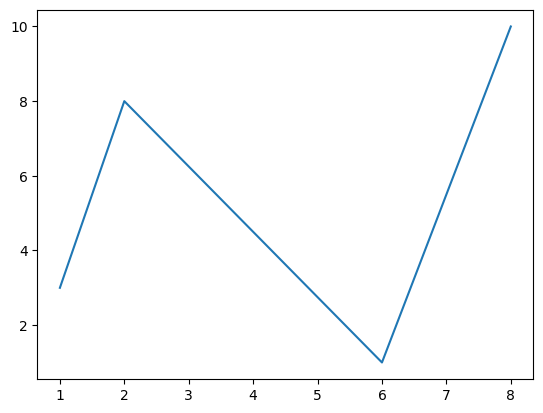

In [ ]:
import matplotlib.pyplot as plt

xpoints = [1, 2, 6, 8]
ypoints = [3, 8, 1, 10]

plt.plot(xpoints, ypoints)
plt.show()

Observați cât de ușor e să construim un grafic simplu. Trebuie doar să specificați tipul de vizualizare și valorile de pe axele x și y. Puteți adăuga labels, customiza setările sau adăuga multiple grafice pe același desen:

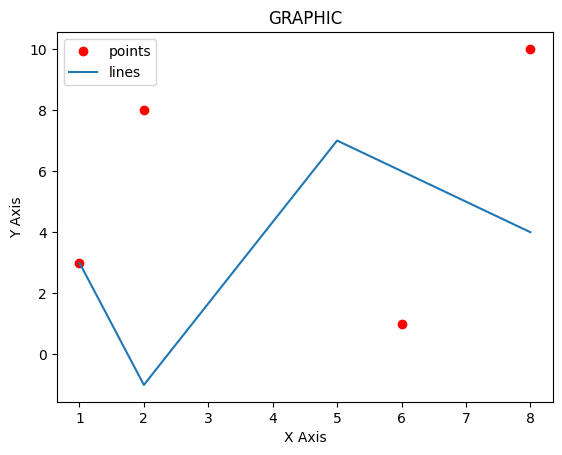

In [ ]:
plt.title("GRAPHIC")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

plt.plot(xpoints, ypoints, 'or', label='points')
plt.plot([1, 2, 5, 8], [3, -1, 7, 4], label='lines')
plt.legend()
plt.show()

Puteți folosi și alte librării pentru vizualizări mai estetice, cum ar fi [Seaborn](https://seaborn.pydata.org/index.html):

<Axes: >

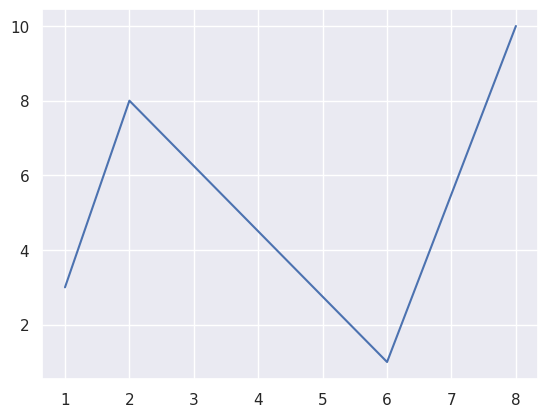

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.lineplot(x=xpoints, y=ypoints)

# Wordcloud

Ultima librărie despre care vom discuta astăzi este [Wordcloud](https://amueller.github.io/word_cloud/). Un wordcloud este o colecție de cuvinte afișate în diferite dimensiuni în funcție de frecvența lor în text.

Librăria împarte textele în cuvinte automat, sărind peste numere și punctuație:

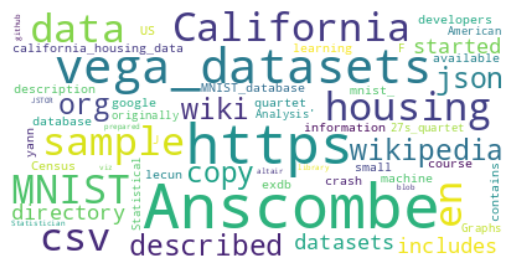

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white")
text = open('sample_data/README.md').read()

wordcloud_picture = wordcloud.generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Putem folosi orice imagine ca o mască în interiorul căreia se vor afla cuvintele:

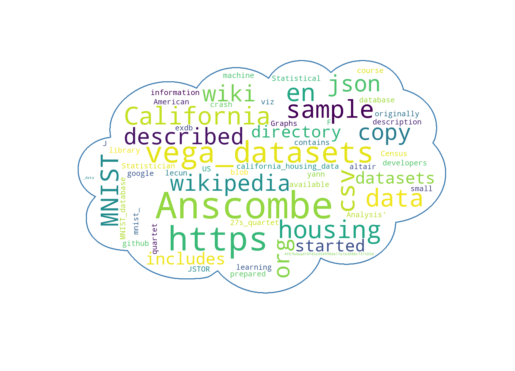

In [ ]:
from PIL import Image
import numpy as np

text = open('sample_data/README.md').read()
url = 'https://dockship-images.s3.ap-south-1.amazonaws.com/afa5d11974963a8e6ec4ec2e0724beeb'

image = requests.get(url, stream=True).raw
mask = np.array(Image.open(image))

wordcloud = WordCloud(max_font_size=100, max_words=2000,
                      background_color="white", mask=mask,
                      contour_width=3, contour_color='steelblue')
wordcloud_picture = wordcloud.generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Exerciții

1. Creați un dataframe (tabel de date) pornind de la pagina de submisii a unui user de pe codeforces sau infoarena. Includeți și link-urile problemelor în tabel.
2. Scrieți o funcție care primește ca parametru un link de la o problemă de pe codeforces și întoarce lista etichetelor (tags). Etichetele unei probleme se găsesc în partea dreaptă a paginii problemei.
3. Adăugați o coloană în tabel cu etichetele pentru fiecare problemă.
4. Creați un wordcloud bazat cu cele mai comune etichete. Asta ne va ajuta să ne dăm seama ce fel de probleme a încercat un utilizator cel mai mult (sau cel mai puțin)
5. Afișează un grafic bazat pe coloana "Verdict". Ar trebui să arate câte probleme au fost acceptate, câte au picat pe primul test etc.
6. Salvează dataframe-ul ca un csv local.
7. Scrie o clasă care primește username-ul unui utilizator la inițializare, creează un dataframe ca variabila statică în clasă cu submisiile (ca la exercițiul 1) și are o serie de funcții care pot fi apelate pentru a rezolva exercițiile 3-6

## Diverse

Exemple de "așa nu"

- https://en.wikipedia.org/wiki/Data_dredging
- https://en.wikipedia.org/wiki/Law_of_truly_large_numbers


![](https://lh3.googleusercontent.com/drive-viewer/AKGpihbspUvY7ihhqqZP_-6Jwr10U0B6viUYP1n_q8rDBD4n-1oLE1pHylIvzXyYzLcAnQ7uxsXInnTFWx6w_PzDFX3ll6oKYQ=w2880-h1645)